# Importing Packages

In [152]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt 
import sys

# Reading in the Data

In [153]:
mas = "https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/"
url1 = "basketball_draft.csv"
url2 = "basketball_hof.csv"
url3 = "basketball_players.csv"
df1 = pd.read_csv(mas+url1)
df2 = pd.read_csv(mas+url2)
df3 = pd.read_csv(mas+url3)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Merging Draft and Player Data

In [154]:
hofdf = df1.merge(df3,left_on='playerID',right_on='playerID',how='inner') 
#First we merge the draft and player data sets on the shared column playerID
hofdf2 = hofdf[hofdf.draftYear > 1980] 
#We are limiting our draft year to after 1980.
hofdf3 = hofdf2[hofdf.draftRound==1]
#We are limiting our draft round to just the first.
hofdf3 = hofdf3[hofdf.draftSelection < 15]
#Then we are limiting our draft selection to 1-14.
hofdf3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,draftYear,draftRound,draftSelection,draftOverall,tmID_x,firstName,lastName,suffixName,playerID,draftFrom,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
12441,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,0,0,NaN
12442,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,0,0,NaN
12443,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,5,27,34,184,88,57,44,5,0,NaN
12444,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,15,16,89,44,32,27,2,1,NaN
12445,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,23,28,214,105,55,35,6,2,NaN
12446,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,9,15,62,31,30,23,4,0,NaN
12447,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,9,41,49,294,147,86,60,34,13,NaN
12448,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,0,0,NaN
12449,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,3,20,38,182,89,38,28,29,8,NaN
12450,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,3,30,51,184,86,52,39,24,8,NaN


# Adding in Hall of Fame Data

In [155]:
df2 = df2.rename(columns={'year': 'hofyear'})
#This is just renaming a column in the hall of fame data to "hofyear" to avoid confusion.
df2 = df2.drop(df2.columns[0:2], axis=1) 
#Here we are dropping unnecessary columns from the hall of fame data.
hofdf3["name"]= hofdf3["firstName"]+ " " + hofdf3["lastName"] 
#We have to create a "name" column in the previous merge so we can successfully fold in the HoF data on this column.
hofdf4 = hofdf3.merge(df2, left_on='name', right_on='name', how='left')
#Now we can merge in the HoF data on the newly created "name" column.
hofdf4

,draftYear,draftRound,draftSelection,draftOverall,tmID_x,firstName,lastName,suffixName,playerID,draftFrom,...,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note,name,category
0,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,NaN,Mark Aguirre,NaN
1,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,NaN,Mark Aguirre,NaN
2,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,34,184,88,57,44,5,0,NaN,Mark Aguirre,NaN
3,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,16,89,44,32,27,2,1,NaN,Mark Aguirre,NaN
4,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,28,214,105,55,35,6,2,NaN,Mark Aguirre,NaN
5,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,15,62,31,30,23,4,0,NaN,Mark Aguirre,NaN
6,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,49,294,147,86,60,34,13,NaN,Mark Aguirre,NaN
7,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,0,0,0,0,0,0,0,NaN,Mark Aguirre,NaN
8,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,38,182,89,38,28,29,8,NaN,Mark Aguirre,NaN
9,1981,1,1,1,DAL,Mark,Aguirre,NaN,aguirma01,DePaul,...,51,184,86,52,39,24,8,NaN,Mark Aguirre,NaN


# Draft Selection vs. Points Scored

The following is a scatterplot with points scored on the y axis and the player's draft selection number on the x axis. There is no apparent correlation among these two variables; 

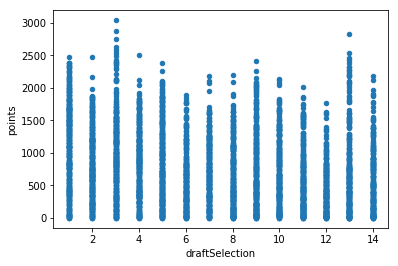

In [158]:
hofdf4.plot.scatter(x="draftSelection",y="points")

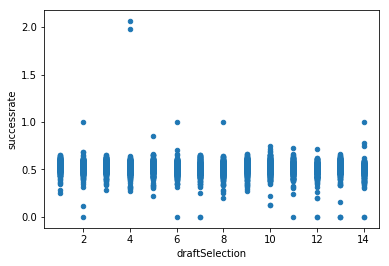

In [157]:
hofdf4["success"]= hofdf4["fgMade"]+hofdf4["ftMade"] 
hofdf4["attempted"]= hofdf4["fgAttempted"]+hofdf4["ftAttempted"] 
hofdf4["successrate"]= hofdf4["success"]/hofdf4["attempted"] 
hofdf4.plot.scatter(x="draftSelection",y="successrate")

In [133]:
hofdf3["successrate"].mean()

0.5208449147699339

In [73]:
#df20 = df2[df2["category"]=="Player"]
#df20